# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [5]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [6]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [9]:
df = pd.read_csv('used_device_data.csv')

In [10]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Data Overview

- Observations
- Sanity checks

In [13]:
df.shape

(3454, 15)

The shape () function indicates there are 15 features (columns) and 3454 observations (rows). 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

The info() function indicates that 6 features have missing values that will need to be addressed.

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

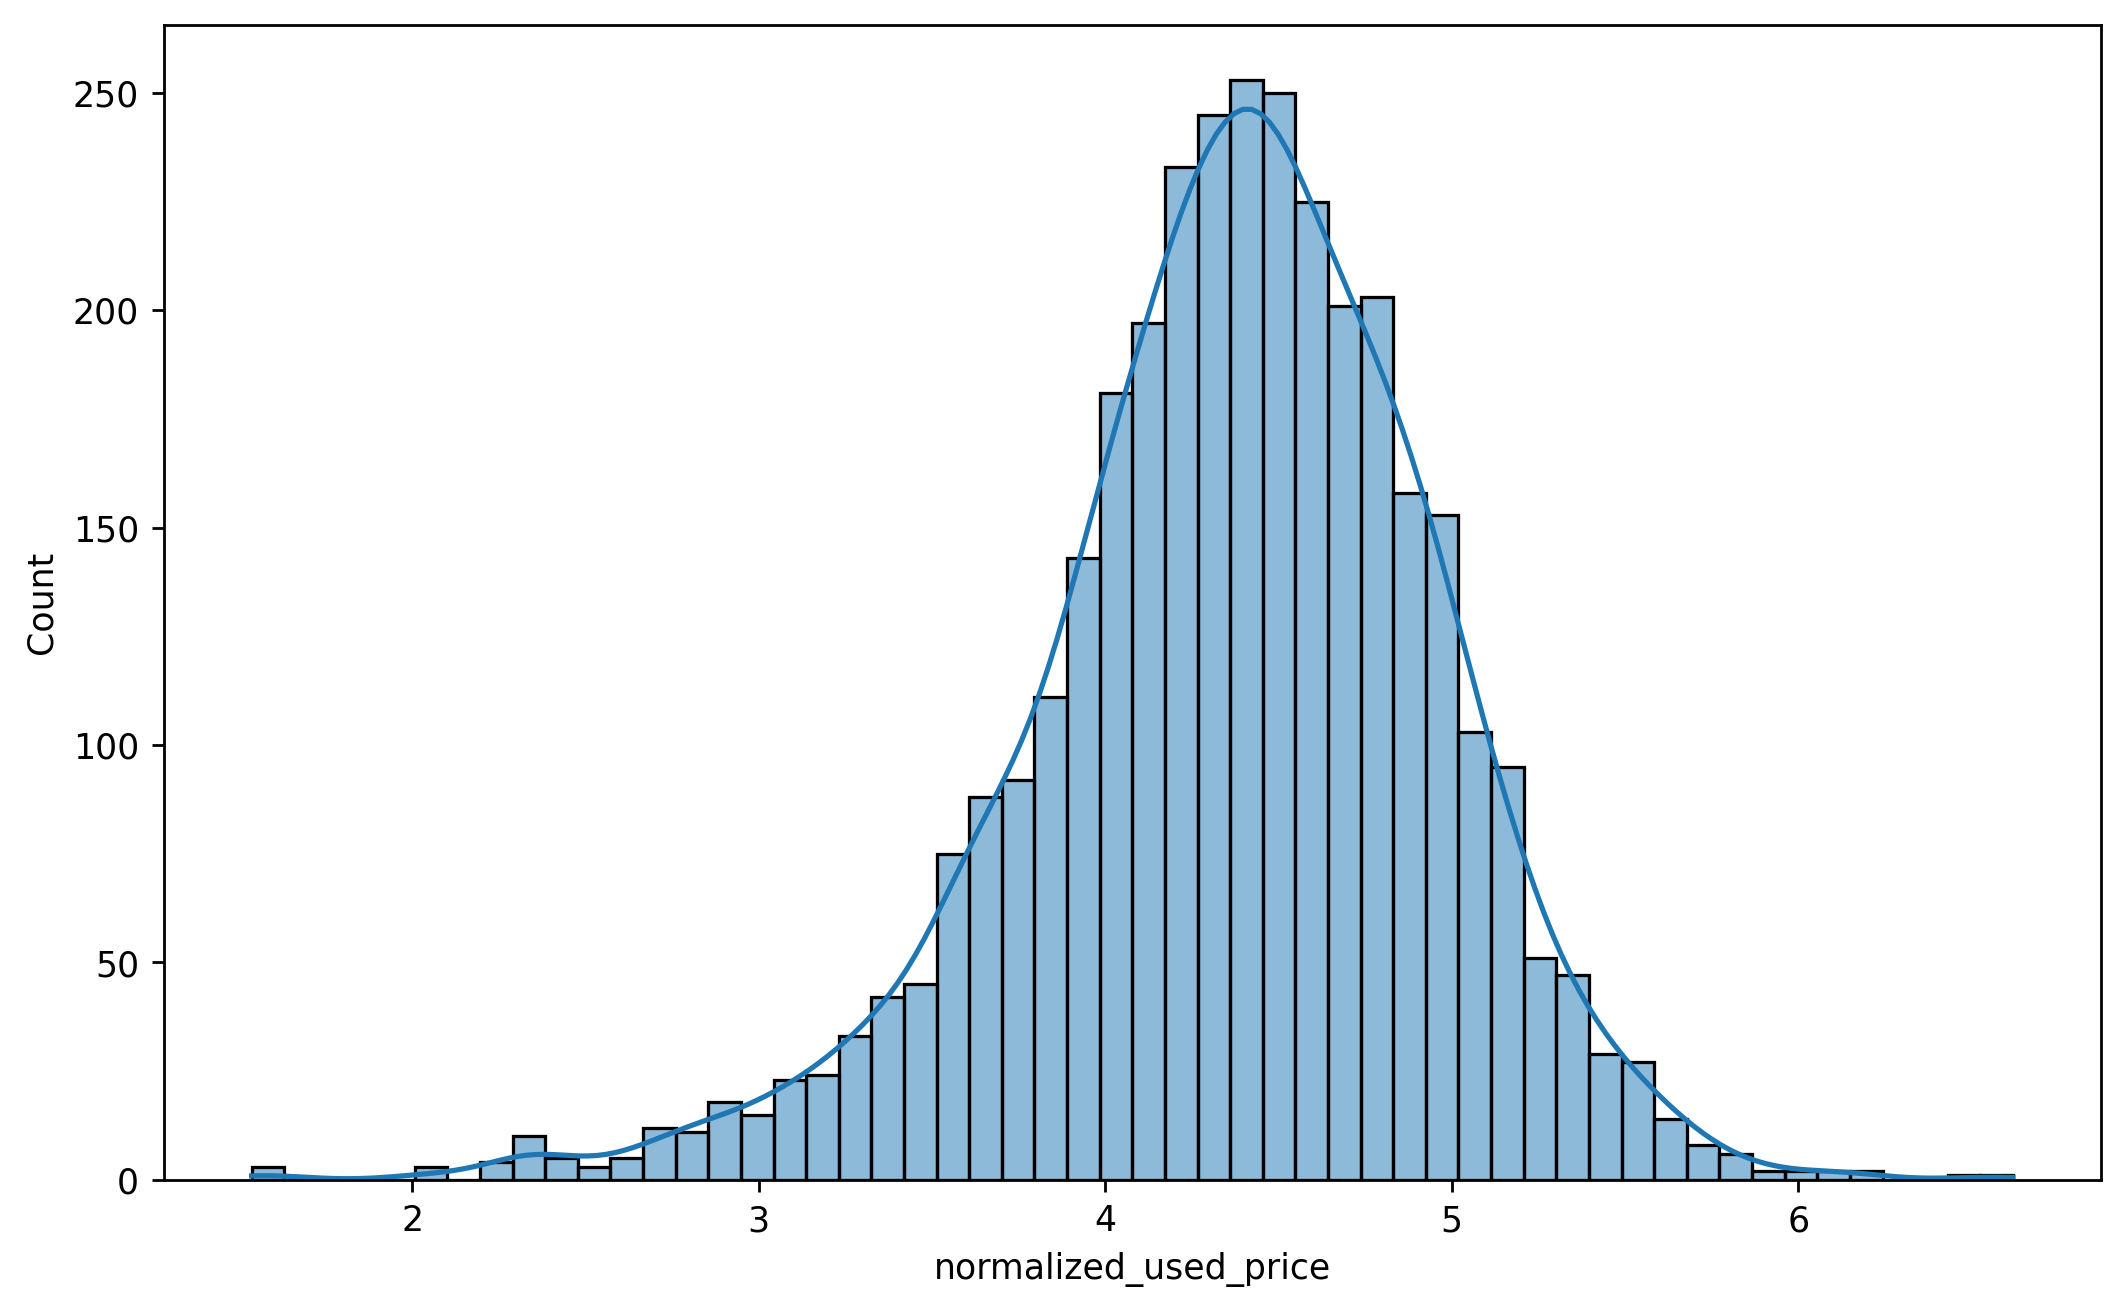

In [21]:
plt.figure(figsize=(10, 6), dpi=250)
sns.histplot(data=df['normalized_used_price'], kde=True);

The normalized used price of phones are normally distributed.

In [23]:
os_list = df['os'].unique()
print(os_list)

['Android' 'Others' 'iOS' 'Windows']


In [24]:
count_android = df['os'].value_counts().get('Android')
# print(count_android)
percent_android = (count_android/3454)*100
print(f'The percentage of Android phones is {percent_android:.2f}%')

The percentage of Android phones is 93.05%


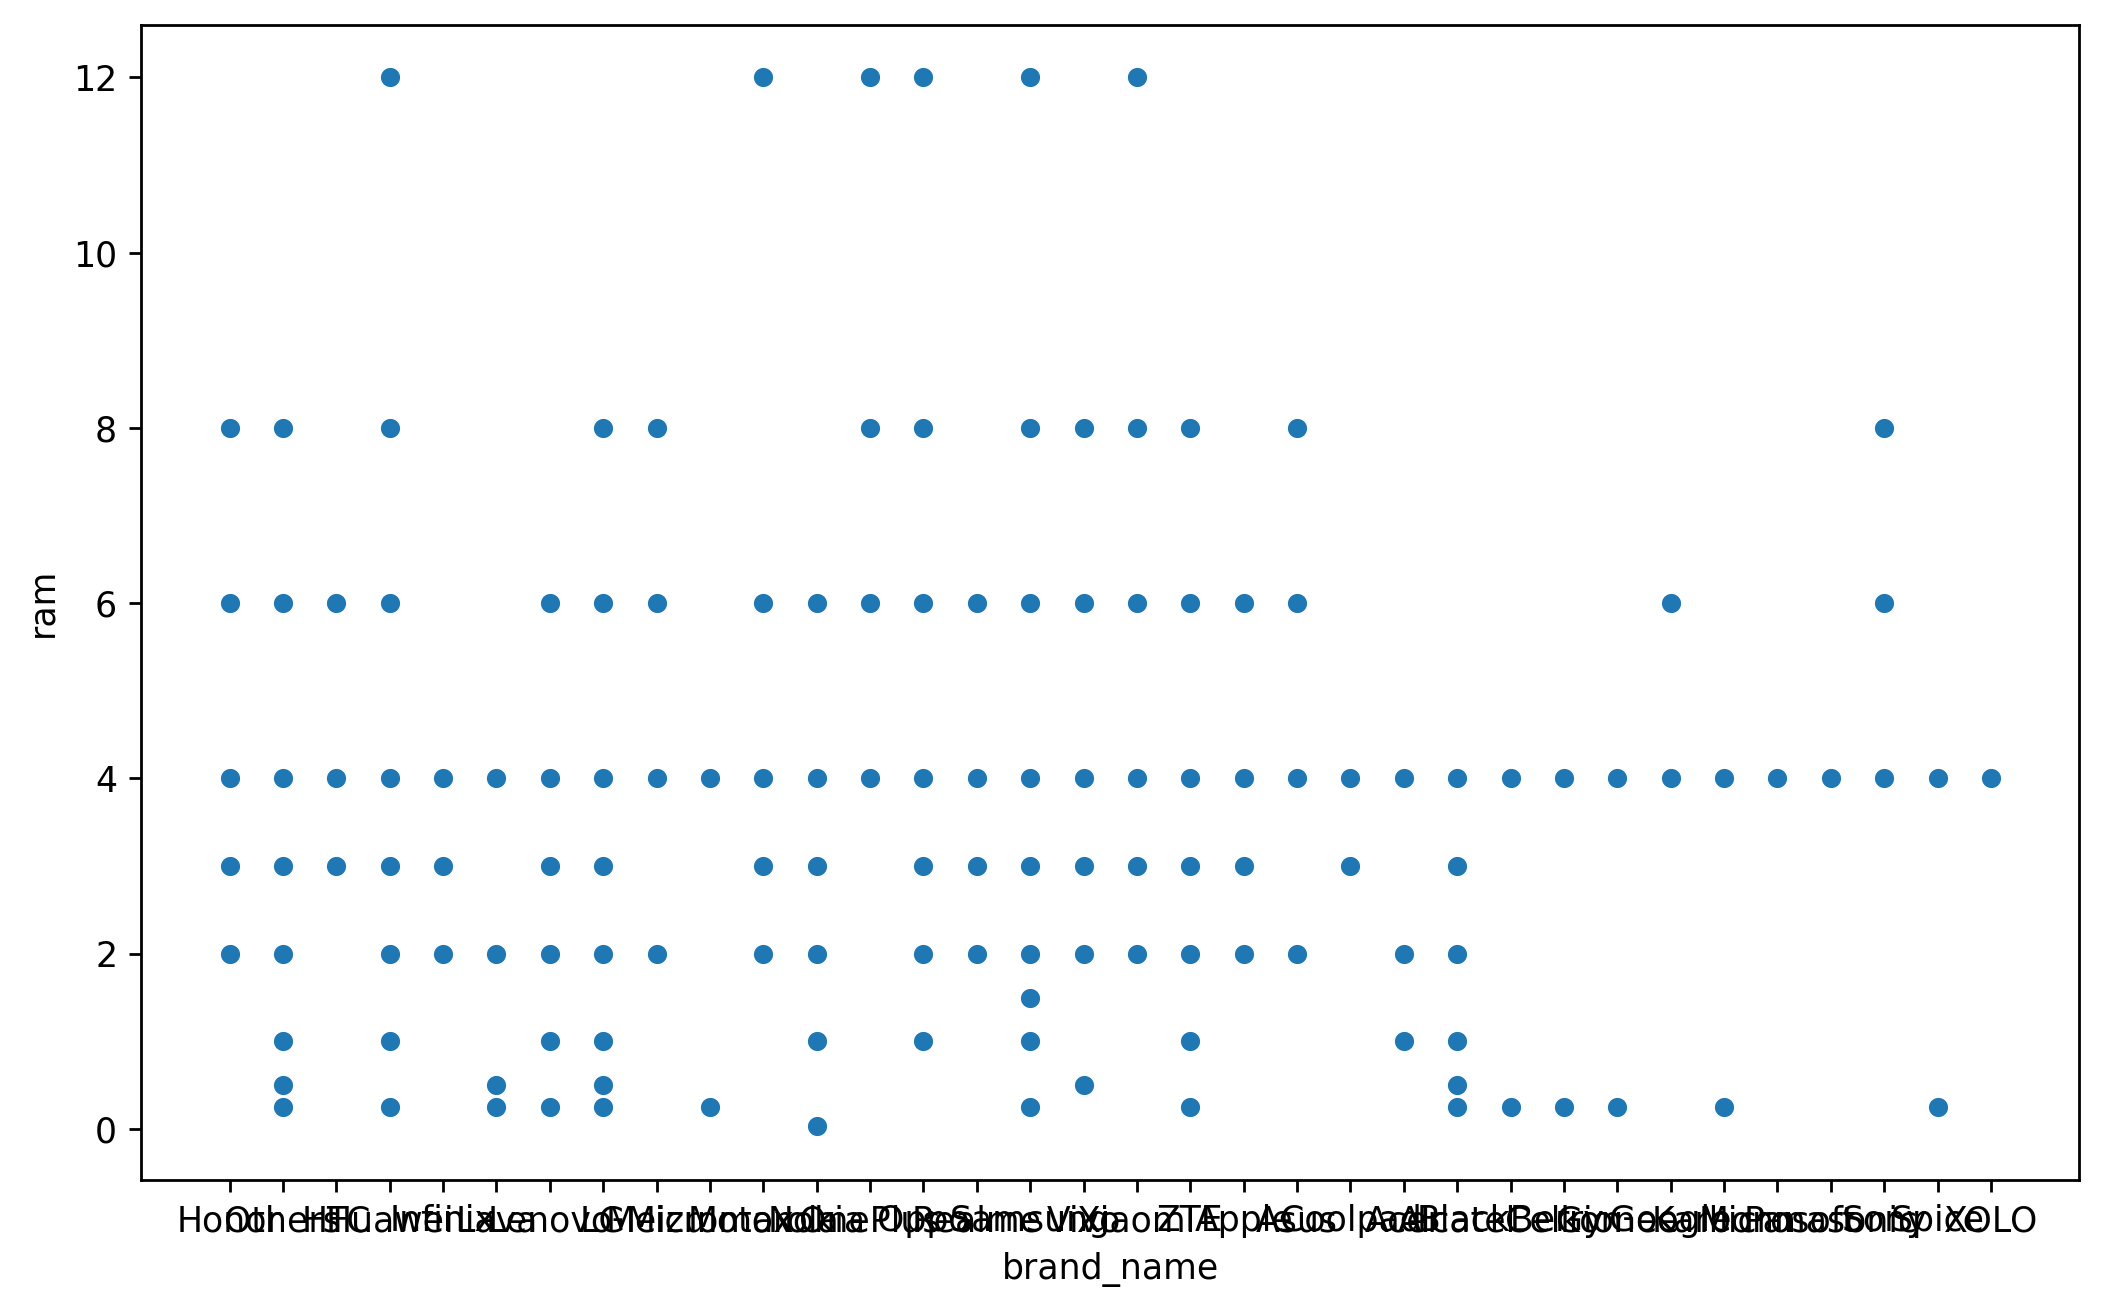

In [25]:
# sns.stripplot(x='device_type', y='device_price', data=df, jitter=True)
plt.figure(figsize=(10, 6), dpi=250)
sns.scatterplot(data=df, x='brand_name', y='ram');

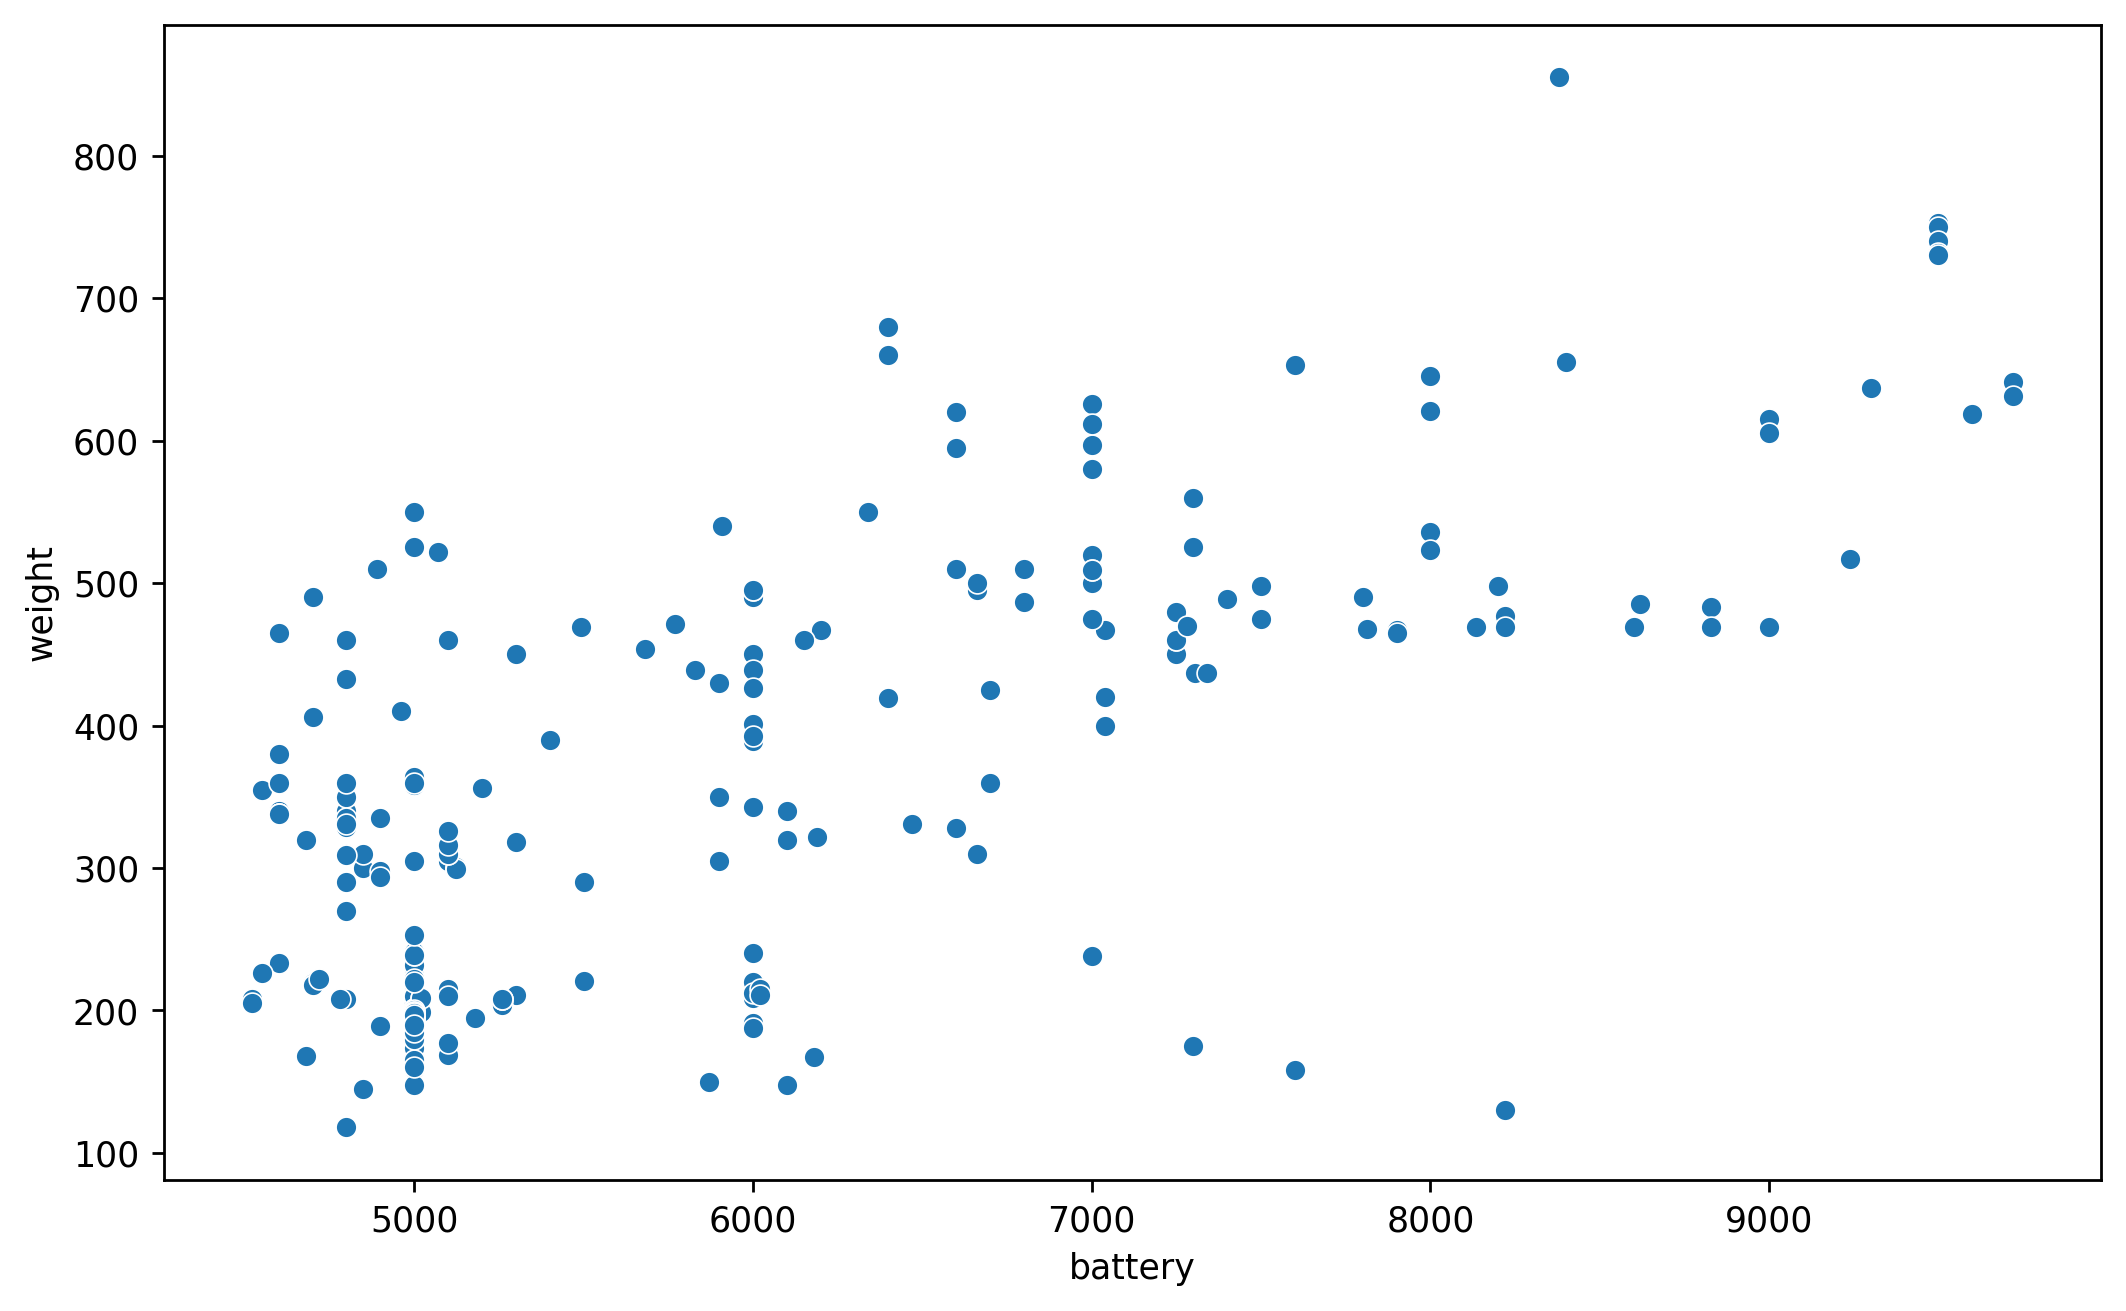

In [26]:
plt.figure(figsize=(10, 6), dpi=250)
df_large_battery = df[df['battery'] > 4500]
sns.scatterplot(x='battery', y='weight', data=df_large_battery);

There is a relationship between battery power and weight.

In [28]:
plt.figure(figsize=(10, 6), dpi=250)
df_large_screen = df[df['screen_size'] > 6]
device_counts = df_large_screen.groupby(['brand_name', 'screen_size']).size().reset_index(name='count')
print(device_counts)

    brand_name  screen_size  count
0         Acer         7.75      2
1         Acer        10.16      4
2         Acer        10.24      1
3         Acer        10.29      5
4         Acer        10.34      1
..         ...          ...    ...
637        ZTE        16.31      1
638        ZTE        16.36      1
639        ZTE        16.43      2
640        ZTE        16.48      1
641        ZTE        16.89      5

[642 rows x 3 columns]


<Figure size 2500x1500 with 0 Axes>

In [29]:
df2 = df.copy()
columns_to_drop = ['brand_name', 'os', '4g', '5g']
df2.drop(columns=columns_to_drop, axis=1, inplace=True)

In [30]:
df2.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


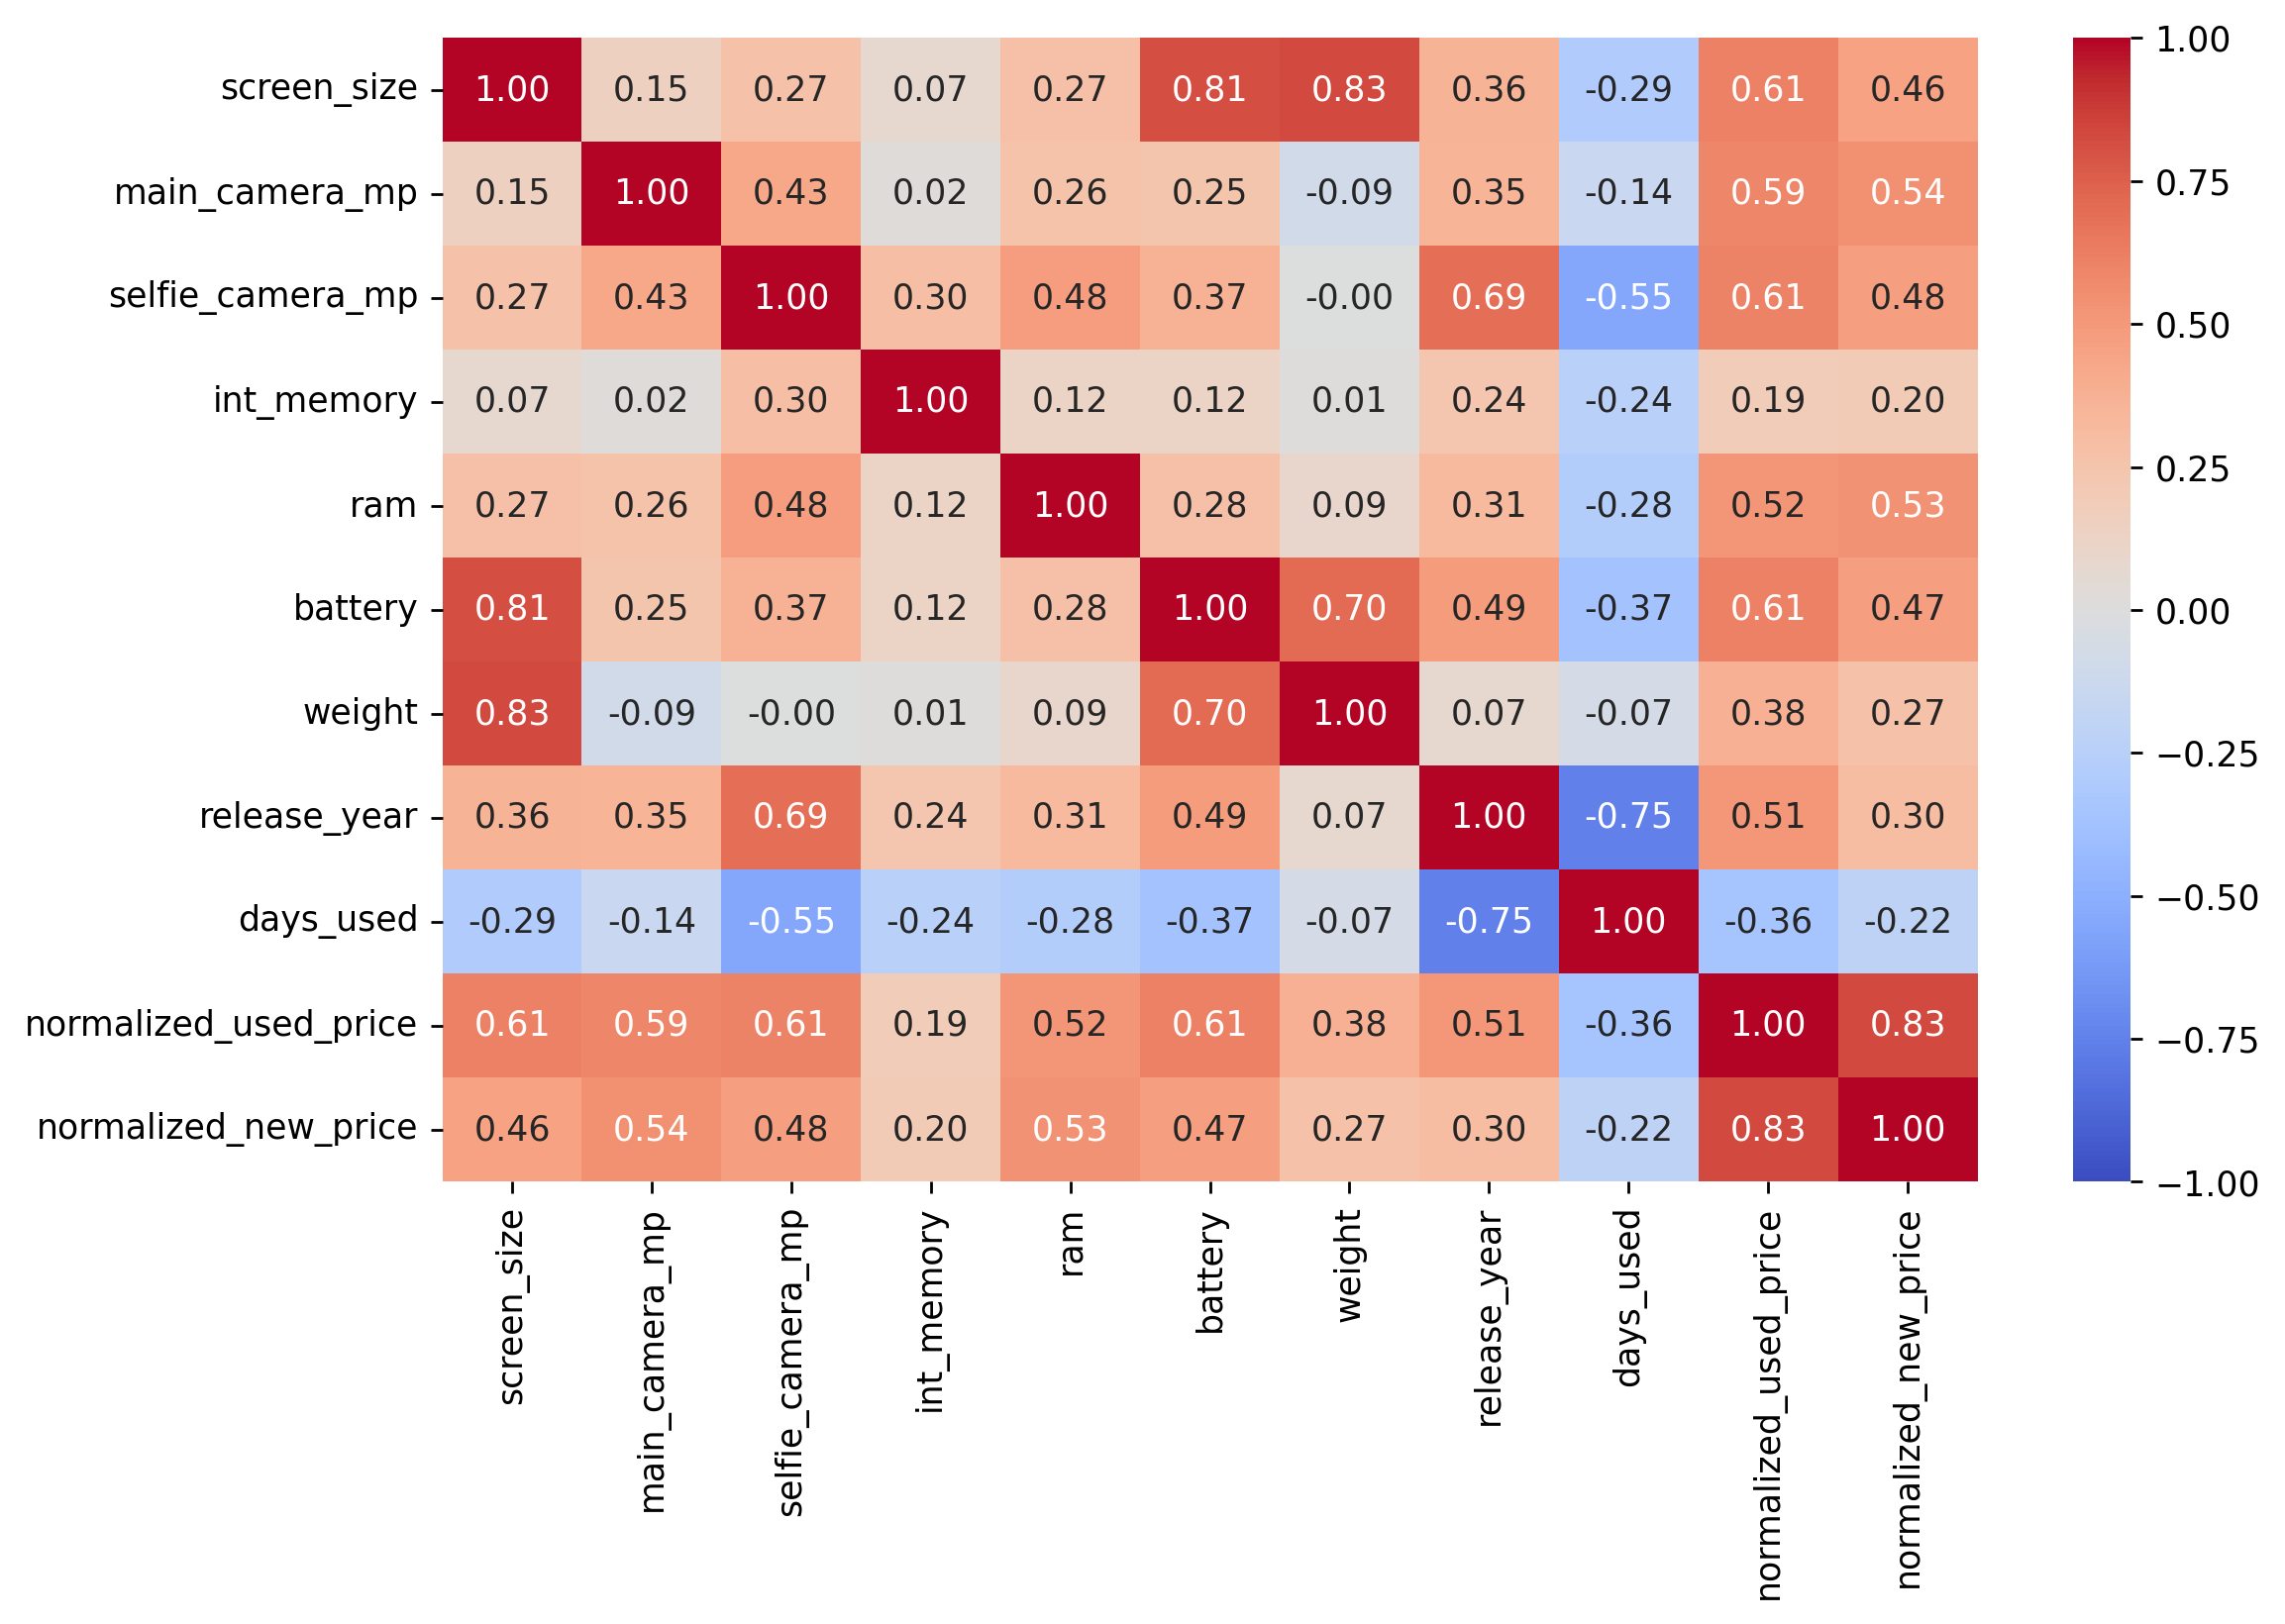

In [31]:
plt.figure(figsize=(10, 6), dpi=250)
sns.heatmap(data=df2.corr(), cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1);

Features that are highly correlated with the normalized price of a used phone are: 
* Normalized price of a new phone - 0.83
* Screen size - 0.61
* Selfie Cam mp - 0.61
* Battery - 0.61
* Main camera mp - 0.59
* Release year - 0.51

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Outliers
Identifying and dealing with outliers

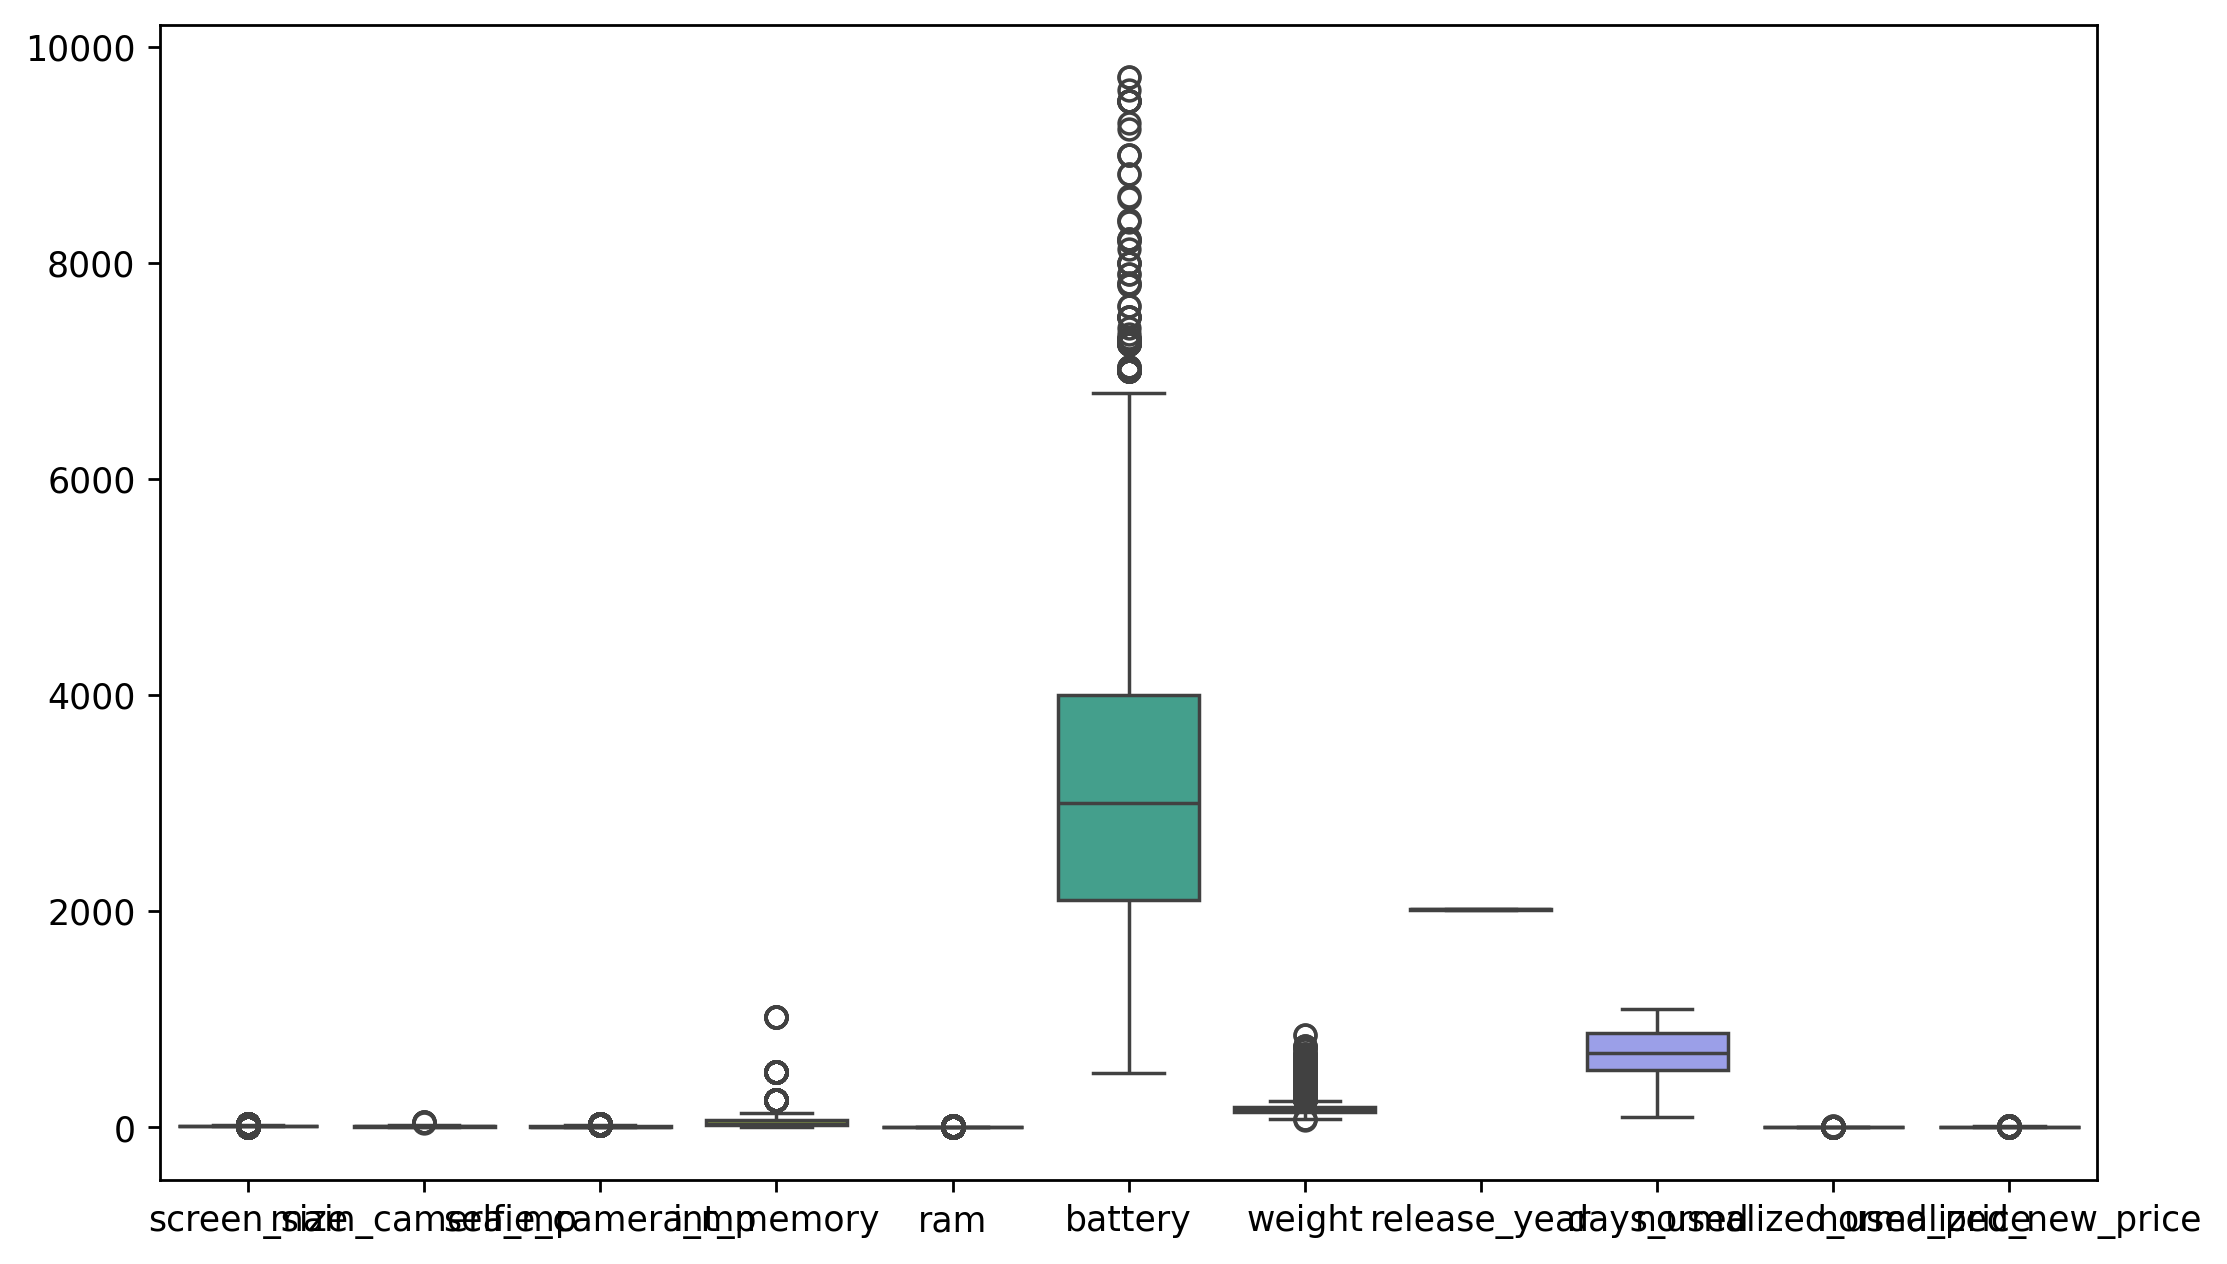

In [36]:
plt.figure(figsize=(10, 6), dpi=250)
sns.boxplot(data=df2);

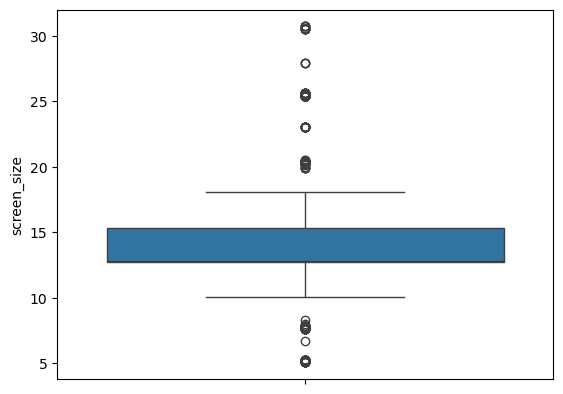

In [37]:
sns.boxplot(data=df2['screen_size']);

Screen size appears to have outliers at both ends of the range

In [39]:
# Outliers cappend at 3 standard deviations
mean = df['screen_size'].mean()
std = df['screen_size'].std()

k=3
lower_bound = mean - k * std
upper_bound = mean + k * std

df['screen_size'] = np.where(df['screen_size'] > upper_bound, upper_bound, df['screen_size'])
df['screen_size'] = np.where(df['screen_size'] < lower_bound, lower_bound, df['screen_size'])


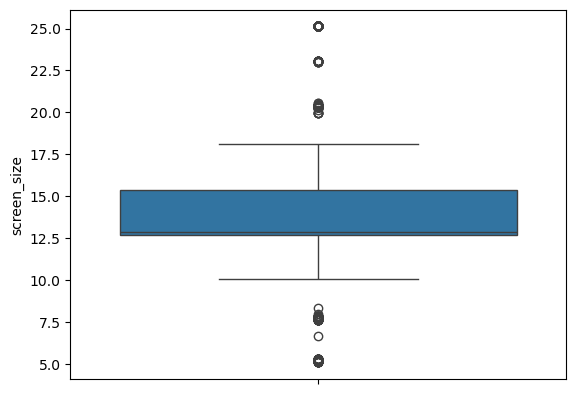

In [40]:
sns.boxplot(data=df['screen_size']);

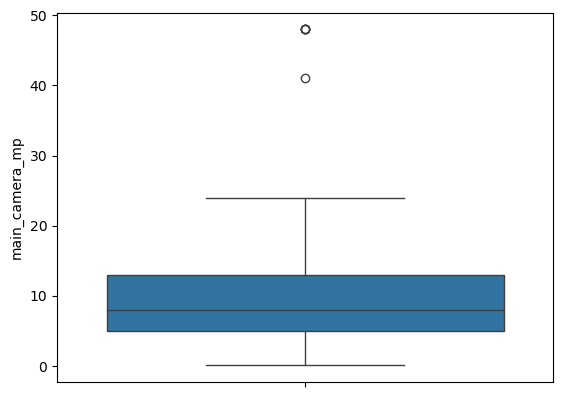

In [41]:
sns.boxplot(data=df2['main_camera_mp']);

In [42]:
# Outliers cappend at 3 standard deviations
mean = df['main_camera_mp'].mean()
std = df['main_camera_mp'].std()

k=3
lower_bound = mean - k * std
upper_bound = mean + k * std

df['main_camera_mp'] = np.where(df['main_camera_mp'] > upper_bound, upper_bound, df['main_camera_mp'])
df['main_camera_mp'] = np.where(df['main_camera_mp'] < lower_bound, lower_bound, df['main_camera_mp'])

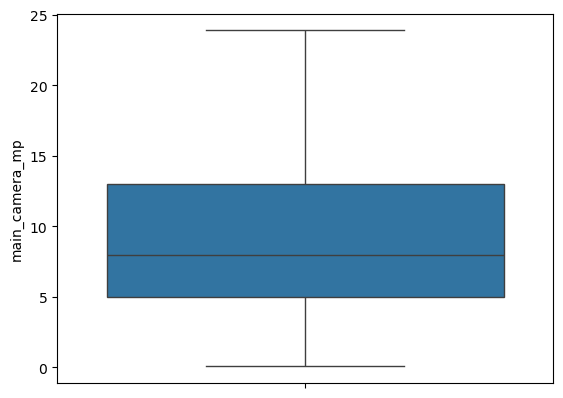

In [43]:
sns.boxplot(data=df['main_camera_mp']);

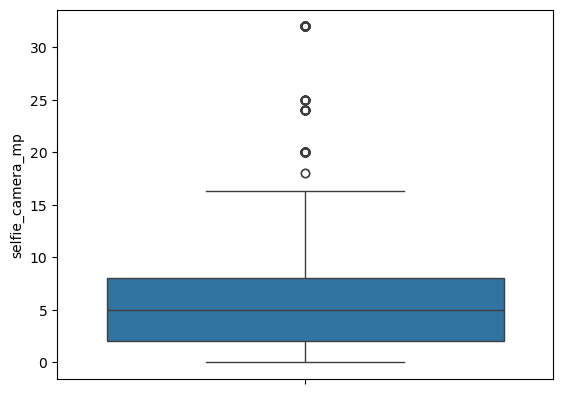

In [44]:
sns.boxplot(data=df2['selfie_camera_mp']);

In [45]:
# Outliers cappend at 3 standard deviations
mean = df['selfie_camera_mp'].mean()
std = df['selfie_camera_mp'].std()

k=3
lower_bound = mean - k * std
upper_bound = mean + k * std

df['selfie_camera_mp'] = np.where(df['selfie_camera_mp'] > upper_bound, upper_bound, df['selfie_camera_mp'])
df['selfie_camera_mp'] = np.where(df['selfie_camera_mp'] < lower_bound, lower_bound, df['selfie_camera_mp'])

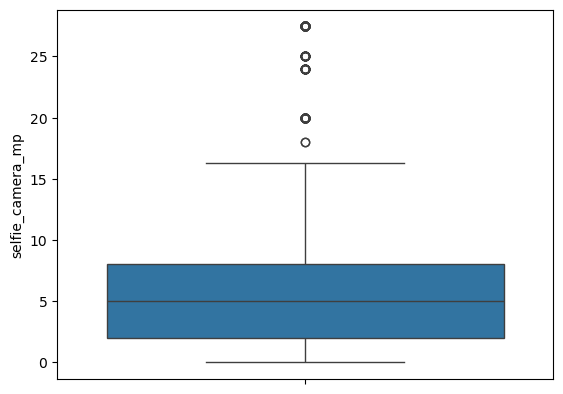

In [46]:
sns.boxplot(data=df['selfie_camera_mp']);

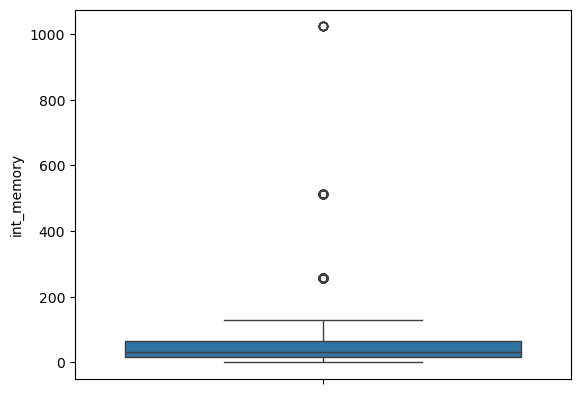

In [47]:
sns.boxplot(data=df2['int_memory']);

In [48]:
# Outliers cappend at 3 standard deviations
mean = df['int_memory'].mean()
std = df['int_memory'].std()

k=3
lower_bound = mean - k * std
upper_bound = mean + k * std

df['int_memory'] = np.where(df['int_memory'] > upper_bound, upper_bound, df['int_memory'])
df['int_memory'] = np.where(df['int_memory'] < lower_bound, lower_bound, df['int_memory'])

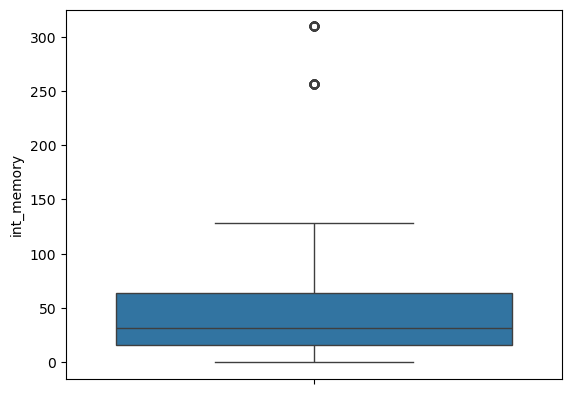

In [49]:
sns.boxplot(data=df['int_memory']);

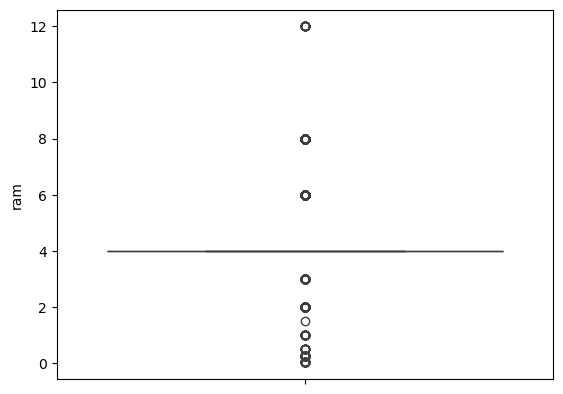

In [50]:
sns.boxplot(data=df2['ram']);

In [51]:
# Outliers cappend at 3 standard deviations
mean = df['ram'].mean()
std = df['ram'].std()

k=3
lower_bound = mean - k * std
upper_bound = mean + k * std

df['ram'] = np.where(df['ram'] > upper_bound, upper_bound, df['ram'])
df['ram'] = np.where(df['ram'] < lower_bound, lower_bound, df['ram'])

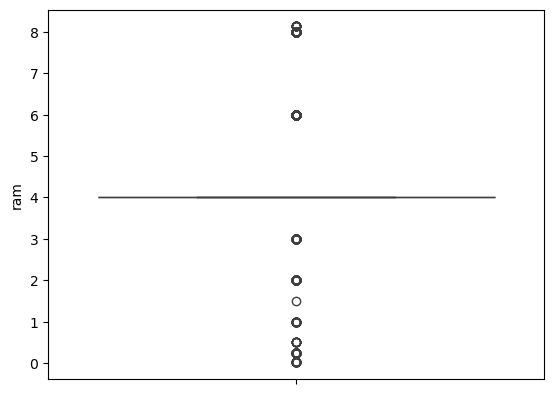

In [52]:
sns.boxplot(data=df['ram']);

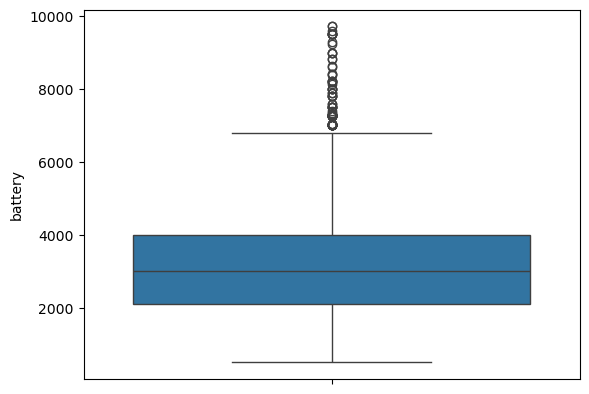

In [53]:
sns.boxplot(data=df2['battery']);

In [54]:
# Outliers cappend at 3 standard deviations
mean = df['battery'].mean()
std = df['battery'].std()

k=3
lower_bound = mean - k * std
upper_bound = mean + k * std

df['battery'] = np.where(df['battery'] > upper_bound, upper_bound, df['battery'])
df['battery'] = np.where(df['battery'] < lower_bound, lower_bound, df['battery'])

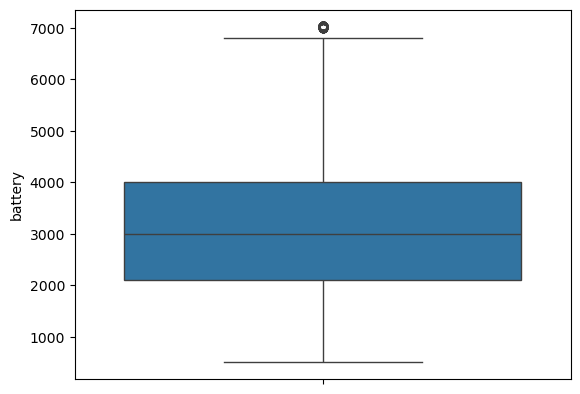

In [55]:
sns.boxplot(data=df['battery']);

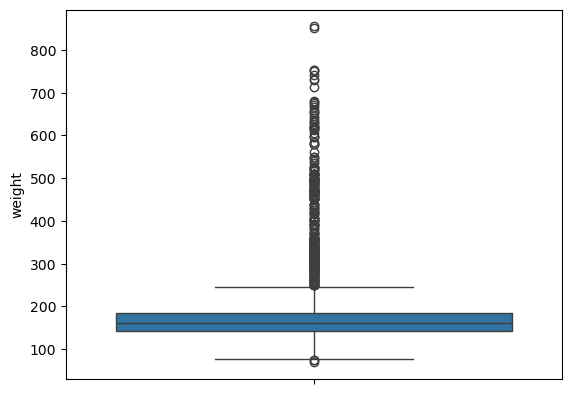

In [56]:
sns.boxplot(data=df2['weight']);

In [57]:
# Outliers cappend at 3 standard deviations
mean = df['weight'].mean()
std = df['weight'].std()

k=3
lower_bound = mean - k * std
upper_bound = mean + k * std

df['weight'] = np.where(df['weight'] > upper_bound, upper_bound, df['weight'])
df['weight'] = np.where(df['weight'] < lower_bound, lower_bound, df['weight'])

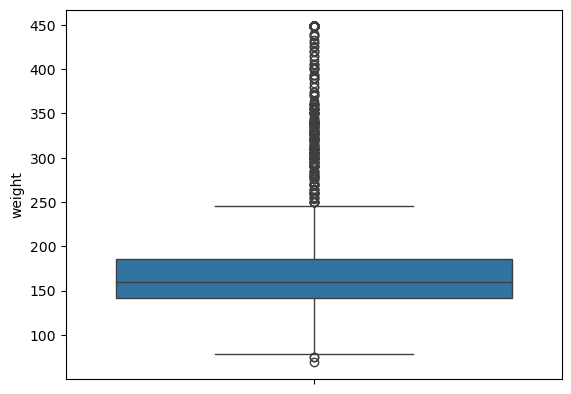

In [58]:
sns.boxplot(data=df['weight']);

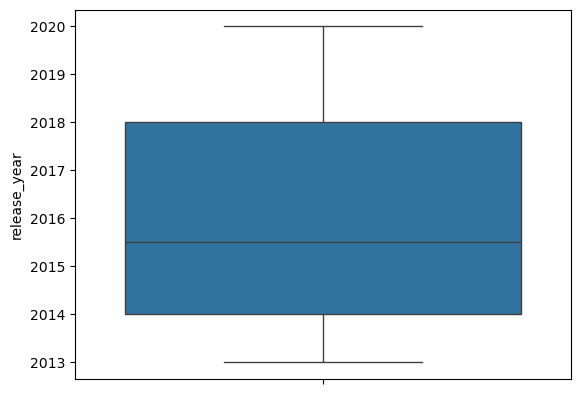

In [59]:
sns.boxplot(data=df2['release_year']);

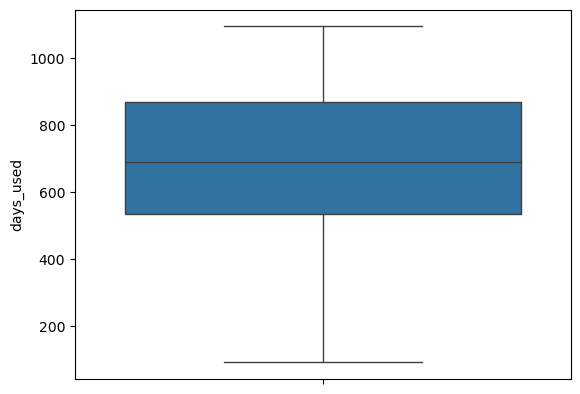

In [60]:
sns.boxplot(data=df2['days_used']);

### Missing Values

In [62]:
missing_data = df.isnull()
missing_data.head()

for column in missing_data.columns:
    value_counts = missing_data[column].value_counts()
    if True in value_counts:  # Check if there are missing values (True)
        print(f"Missing data for column: {column}")
        print(value_counts)
        print(" ")


Missing data for column: main_camera_mp
main_camera_mp
False    3275
True      179
Name: count, dtype: int64
 
Missing data for column: selfie_camera_mp
selfie_camera_mp
False    3452
True        2
Name: count, dtype: int64
 
Missing data for column: int_memory
int_memory
False    3450
True        4
Name: count, dtype: int64
 
Missing data for column: ram
ram
False    3450
True        4
Name: count, dtype: int64
 
Missing data for column: battery
battery
False    3448
True        6
Name: count, dtype: int64
 
Missing data for column: weight
weight
False    3447
True        7
Name: count, dtype: int64
 


In [63]:
df['main_camera_mp'] = df['main_camera_mp'].fillna(df['main_camera_mp'].mean())

In [64]:
df['selfie_camera_mp'] = df['selfie_camera_mp'].fillna(df['selfie_camera_mp'].mean())

In [65]:
df['int_memory'] = df['int_memory'].fillna(df['int_memory'].mean())

In [66]:
df['ram'] = df['ram'].fillna(df['ram'].mean())

In [67]:
df['battery'] = df['battery'].fillna(df['battery'].mean())

In [68]:
df['weight'] = df['weight'].fillna(df['weight'].mean())

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [70]:
df['os'].value_counts()

os
Android    3214
Others      137
Windows      67
iOS          36
Name: count, dtype: int64

In [71]:
df['brand_name'].value_counts()

brand_name
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: count, dtype: int64

In [72]:
df['4g'].value_counts()

4g
yes    2335
no     1119
Name: count, dtype: int64

In [73]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['4g'] = encoder.fit_transform(df['4g'])

In [74]:
df['5g'].value_counts()

5g
no     3302
yes     152
Name: count, dtype: int64

In [75]:
encoder = LabelEncoder()
df['5g'] = encoder.fit_transform(df['5g'])

### One hot encoding of non-numeric features

In [77]:
df = pd.get_dummies(df, columns=['os'])

In [78]:
df.head()

,brand_name,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,os_Android,os_Others,os_Windows,os_iOS
0,Honor,14.500000,1,0,13.0,5.0,64.0,3.0,3020.000000,146.000000,2020,127,4.307572,4.715100,True,False,False,False
1,Honor,17.300000,1,1,13.0,16.0,128.0,8.0,4300.000000,213.000000,2020,325,5.162097,5.519018,True,False,False,False
2,Honor,16.690000,1,1,13.0,8.0,128.0,8.0,4200.000000,213.000000,2020,162,5.111084,5.884631,True,False,False,False
3,Honor,25.128954,1,1,13.0,8.0,64.0,6.0,7032.451229,447.991555,2020,345,5.135387,5.630961,True,False,False,False
4,Honor,15.320000,1,0,13.0,8.0,64.0,3.0,5000.000000,185.000000,2020,293,4.389995,4.947837,True,False,False,False


In [79]:
df.drop('brand_name', axis=1, inplace=True)
# Decided to drop the brand_name column

In [80]:
df.head()

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,os_Android,os_Others,os_Windows,os_iOS
0,14.500000,1,0,13.0,5.0,64.0,3.0,3020.000000,146.000000,2020,127,4.307572,4.715100,True,False,False,False
1,17.300000,1,1,13.0,16.0,128.0,8.0,4300.000000,213.000000,2020,325,5.162097,5.519018,True,False,False,False
2,16.690000,1,1,13.0,8.0,128.0,8.0,4200.000000,213.000000,2020,162,5.111084,5.884631,True,False,False,False
3,25.128954,1,1,13.0,8.0,64.0,6.0,7032.451229,447.991555,2020,345,5.135387,5.630961,True,False,False,False
4,15.320000,1,0,13.0,8.0,64.0,3.0,5000.000000,185.000000,2020,293,4.389995,4.947837,True,False,False,False


## EDA

- It is a good idea to explore the data once again after manipulating it.

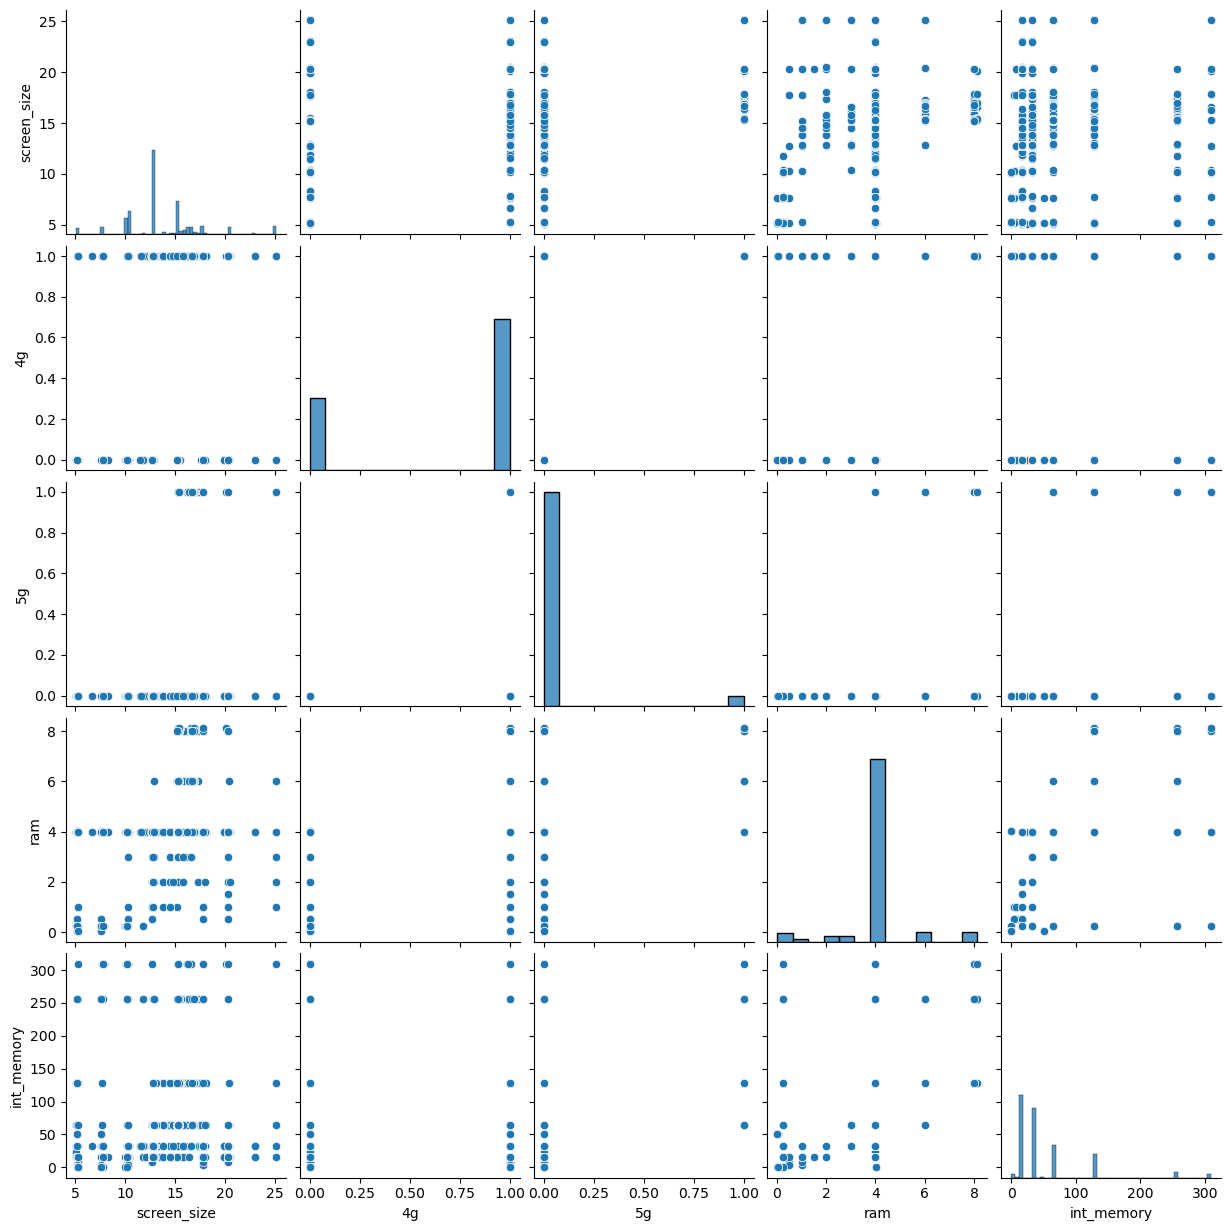

In [83]:
sns.pairplot(data=df,vars=['screen_size', '4g', '5g', 'ram', 'int_memory']);

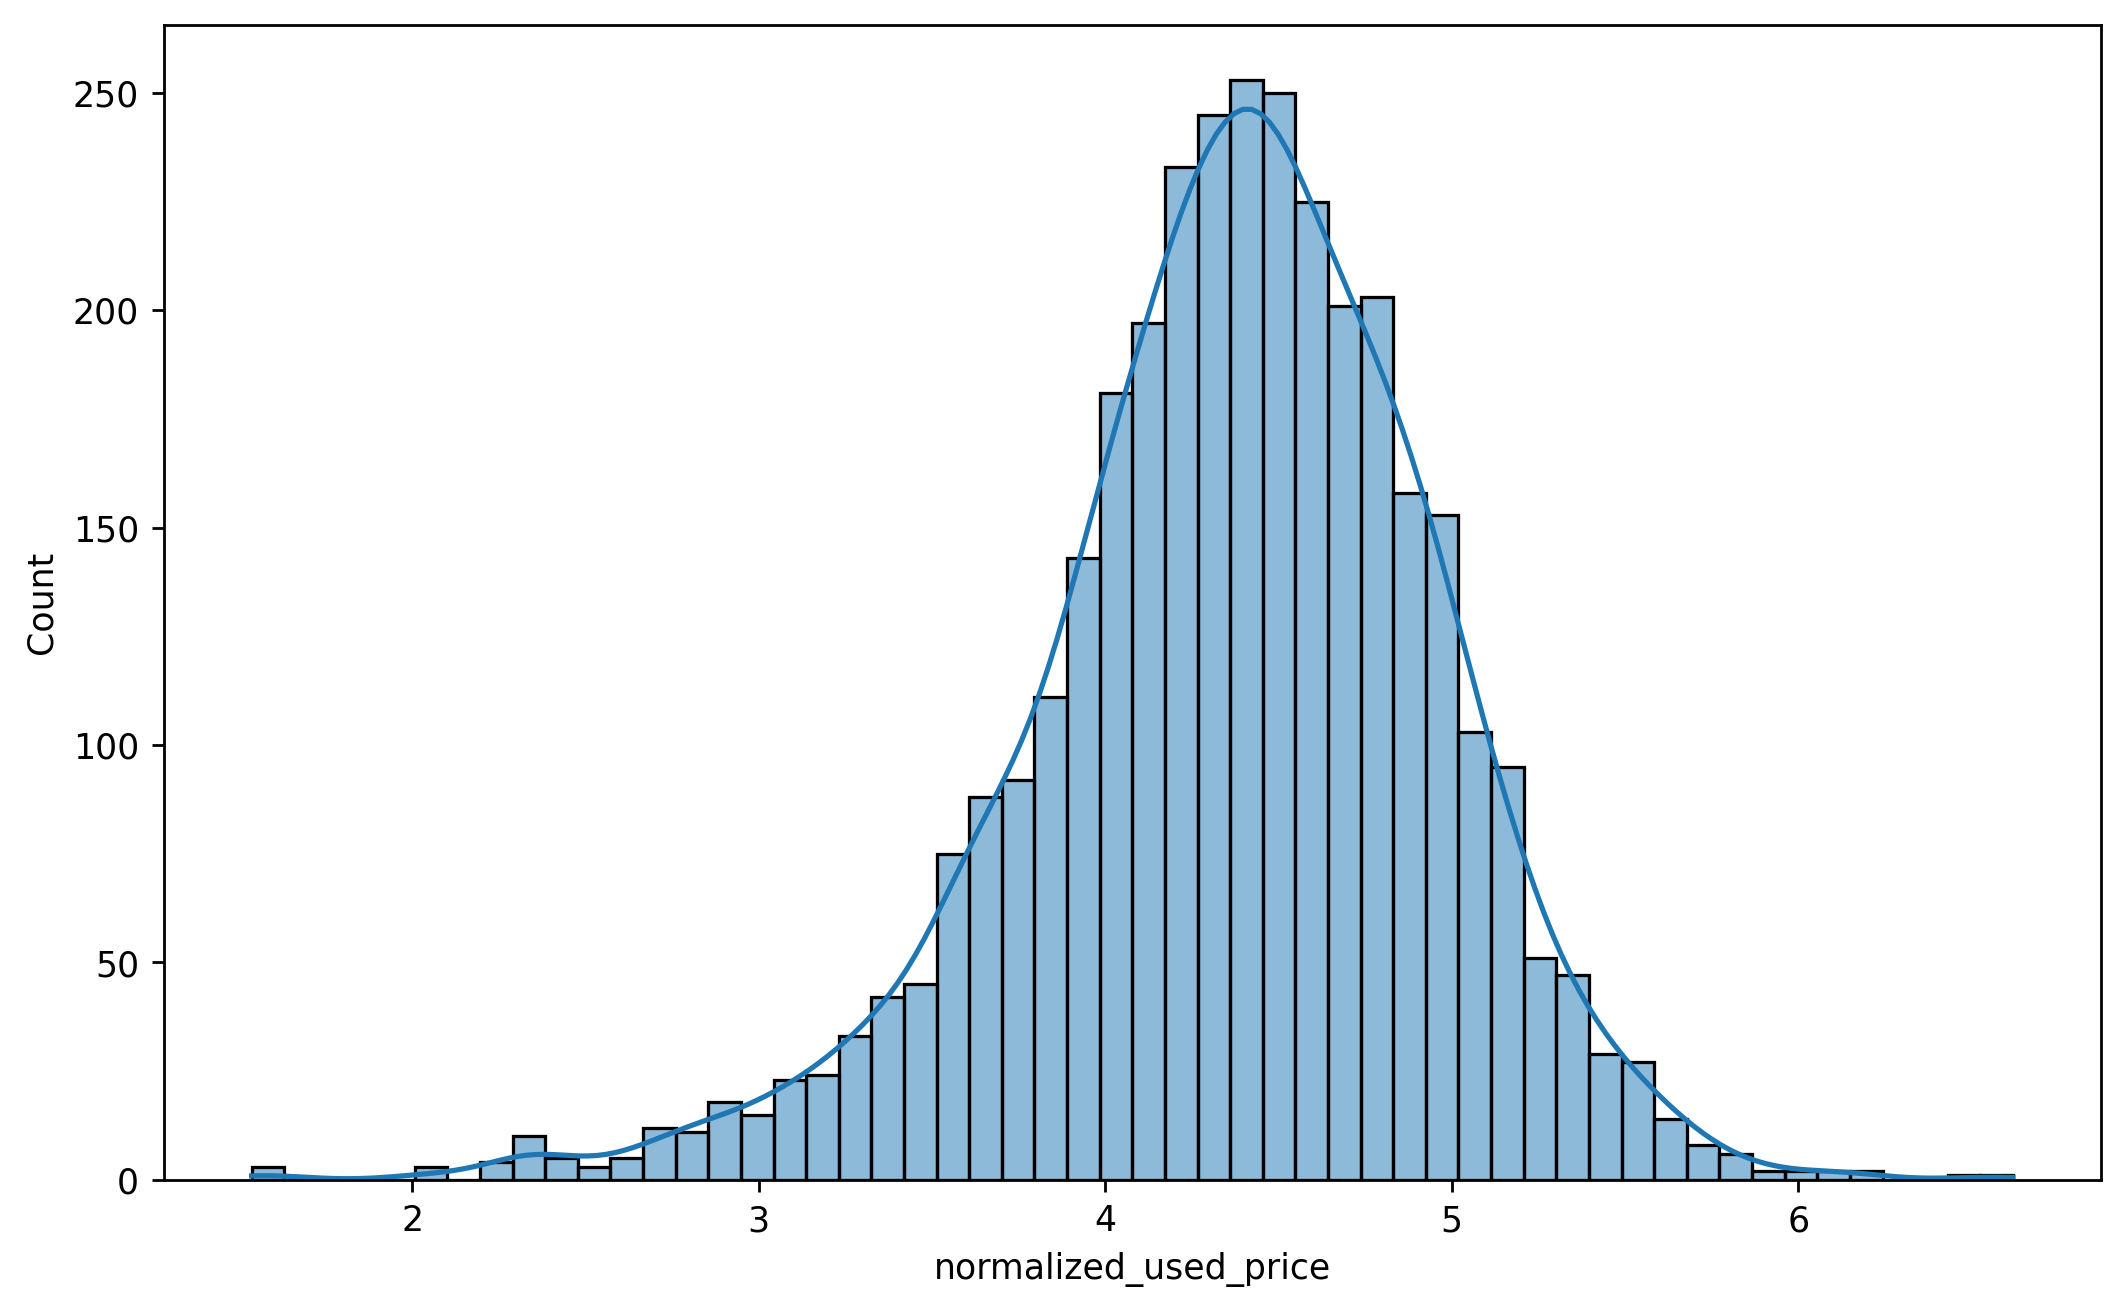

In [84]:
plt.figure(figsize=(10, 6), dpi=250)
sns.histplot(data=df['normalized_used_price'], kde=True);

In [85]:
df.shape

(3454, 17)

In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.683212,3.700104,5.080000,12.700000,12.830000,15.340000,25.128954
4g,3454.0,0.676028,0.468057,0.000000,0.000000,1.000000,1.000000,1.000000
5g,3454.0,0.044007,0.205140,0.000000,0.000000,0.000000,0.000000,1.000000
main_camera_mp,3454.0,9.425419,4.502780,0.080000,5.000000,9.425419,13.000000,23.906591
selfie_camera_mp,3454.0,6.430748,6.543711,0.000000,2.000000,5.000000,8.000000,27.465345
int_memory,3454.0,50.333531,57.697593,0.010000,16.000000,32.000000,64.000000,309.490210
ram,3454.0,4.015938,1.271910,0.020000,4.000000,4.000000,4.000000,8.131436
battery,3454.0,3113.846818,1224.877966,500.000000,2100.000000,3000.000000,4000.000000,7032.451229
weight,3454.0,179.338191,73.250542,69.000000,142.000000,160.000000,185.000000,447.991555
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000


## Model Building - Linear Regression

In [88]:
# Separate X and y
X = df.drop('normalized_used_price', axis=1)
y = df['normalized_used_price']

In [89]:
# train test split 
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

### Standardize data

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### First Model

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
model = LinearRegression()

In [96]:
model.fit(X_train, y_train)

LinearRegression()

In [97]:
test_predictions = model.predict(X_test)

## Model Performance Check

In [99]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [100]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
r2_squared = r2_score(y_test, test_predictions )

In [101]:
MAE

0.18332107820455237

In [102]:
MSE

0.05596185705615511

In [103]:
RMSE

0.2365625859178816

In [104]:
r2_squared 

0.8083399764467557

### Regularized Regression with Grid Search

In [106]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [107]:
pipelines = {
    'ridge': Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]),
    'lasso': Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())]),
    'elasticnet': Pipeline([('scaler', StandardScaler()), ('elasticnet', ElasticNet())])
}

In [108]:
param_grids = {
    'ridge': {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
    'lasso': {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
    'elasticnet': {'elasticnet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                   'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
}

In [109]:
best_params = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params[name] = grid_search.best_params_
    print(f"Best parameters for {name}: {best_params[name]}")

Best parameters for ridge: {'ridge__alpha': 1}
Best parameters for lasso: {'lasso__alpha': 0.001}
Best parameters for elasticnet: {'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 0.5}


In [110]:
for name, pipeline in pipelines.items():
    pipeline.set_params(**best_params[name])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse}")

ridge Mean Squared Error: 0.0559500905624314
lasso Mean Squared Error: 0.05599168297624863
elasticnet Mean Squared Error: 0.05594567241208539


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

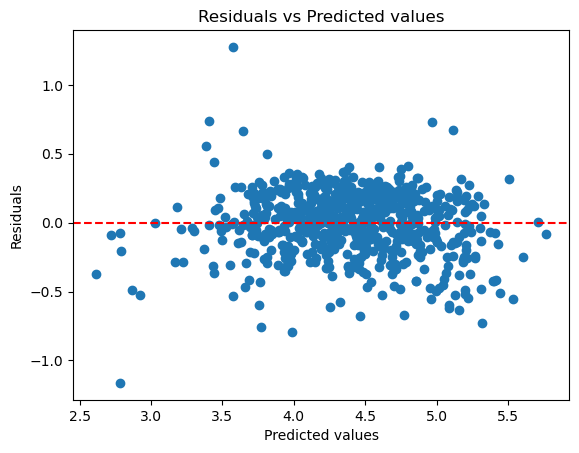

In [113]:
residuals = y_test - test_predictions
plt.scatter(test_predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show();

Assumptions for linear regression are rasonably met. 

## Final Model

The  final model is regular linear regression, regulaized regrssion did not provide enough improvement to warrant the additional complexity.

## Model Explainability with SHAP

In [118]:
import shap

In [119]:
explainer = shap.LinearExplainer(model, X_train)

In [120]:
shap_values = explainer(X_test)
# print(shap_values.values)

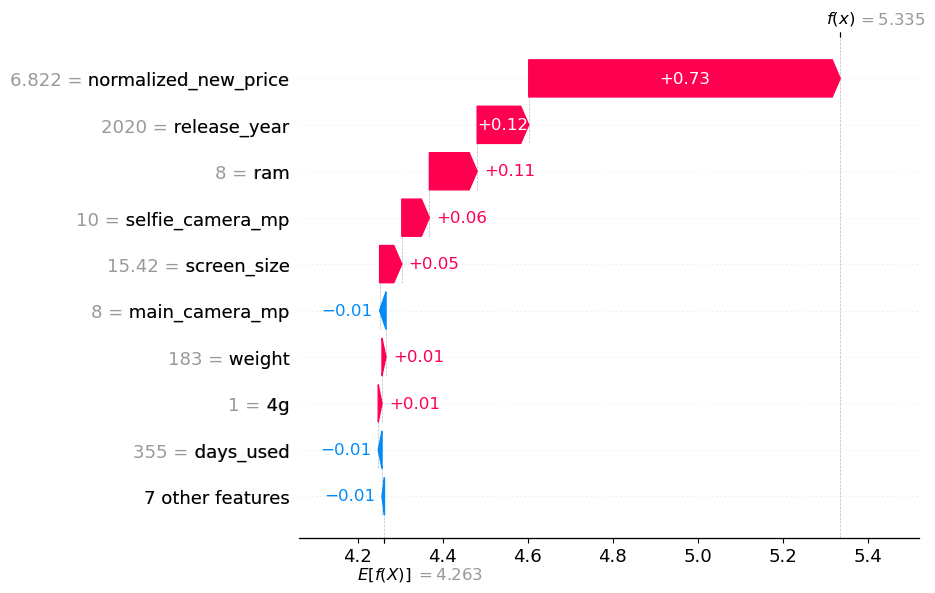

In [121]:
shap.waterfall_plot(shap_values[0])

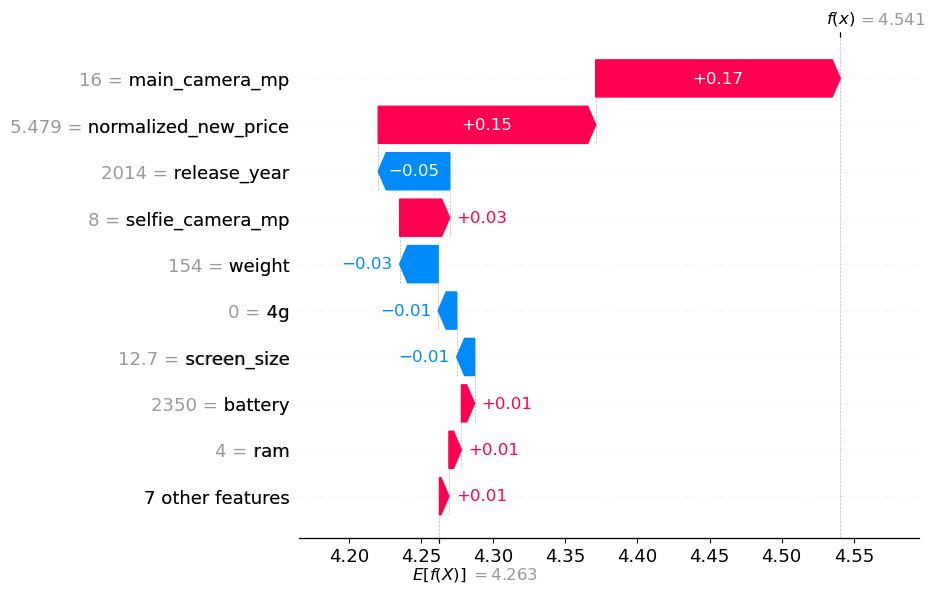

In [122]:
shap.waterfall_plot(shap_values[1])

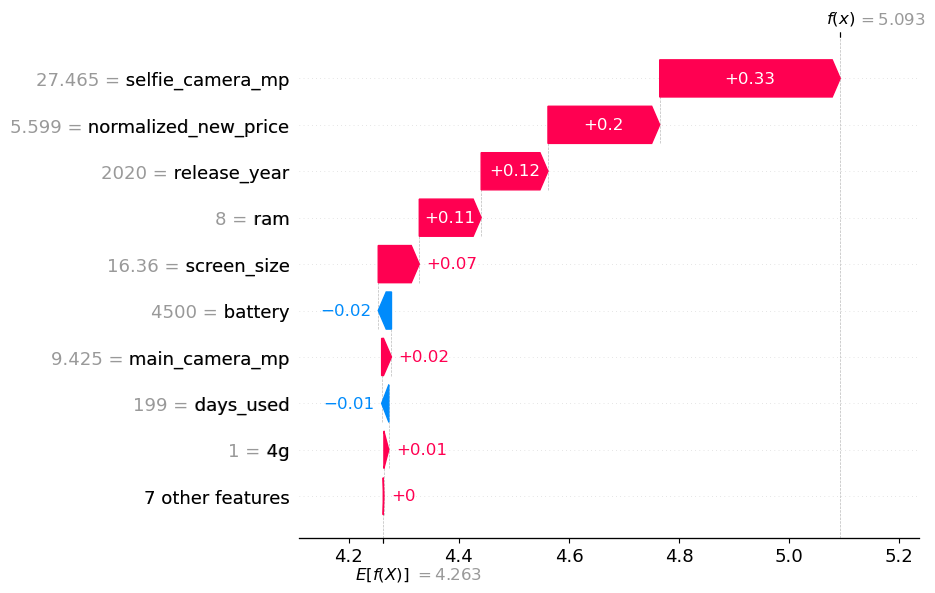

In [123]:
shap.waterfall_plot(shap_values[11])

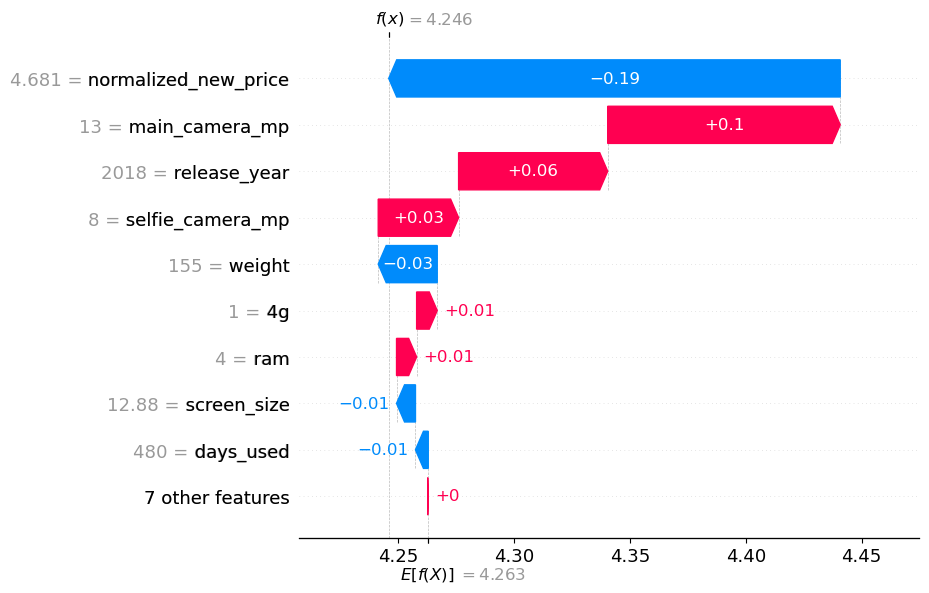

In [124]:
shap.waterfall_plot(shap_values[62])

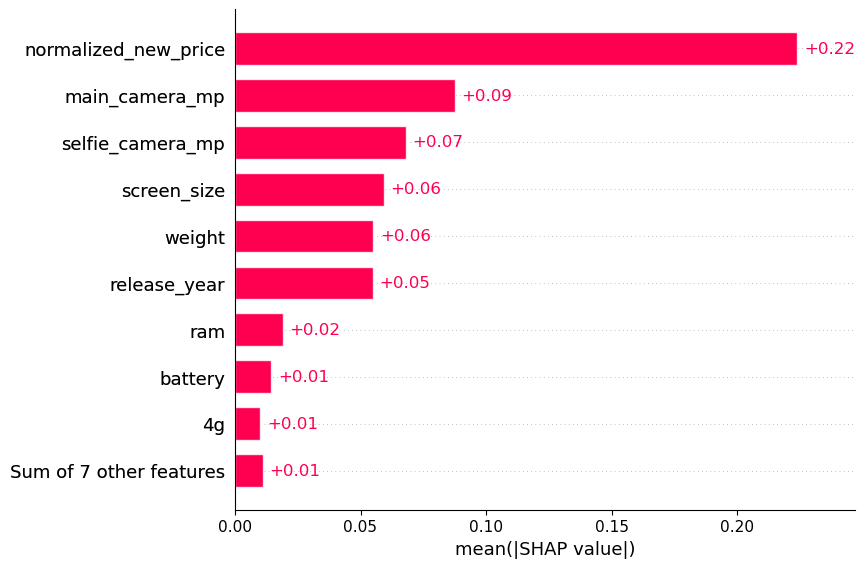

In [125]:
shap.plots.bar(shap_values)

## Actionable Insights and Recommendations

-The SHAP bar chart above shows which features most effect the price of a used device. This provides a high-level (global) view of which features most effect the price. 

-The waterfall charts above provides how the features of individual phones effect its price. 

-Recell can pass the information for individual devices. Passing the features in and runnning through the SHAP model could predict a normalized used price. 

-Under ideal conditions this would be built in framework like Streamlit to ensure the data is properly formatted. 


___